In [1]:
import numpy as np
import pandas as pd

In [2]:
data=pd.read_csv(r"C:\Users\Samir\Downloads\Datascience lovers Datasets\Police Data.csv")

In [3]:
data.head()

,stop_date,stop_time,country_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005,1:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,1/18/2005,8:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,1/23/2005,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2/20/2005,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,3/14/2005,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [4]:
data.shape

(65535, 15)

# 1. Checking and removing null values.

In [5]:
data.isnull().sum()

stop_date                 0
stop_time                 0
country_name          65535
driver_gender          4061
driver_age_raw         4054
driver_age             4307
driver_race            4060
violation_raw          4060
violation              4060
search_conducted          0
search_type           63056
stop_outcome           4060
is_arrested            4060
stop_duration          4060
drugs_related_stop        0
dtype: int64

In [6]:
data.drop(columns=['country_name','search_type'],inplace=True)

In [7]:
data.head(2)

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005,1:55,M,1985.0,20.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False
1,1/18/2005,8:15,M,1965.0,40.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False


In [8]:
data=data.dropna()

In [9]:
data.isnull().sum()

stop_date             0
stop_time             0
driver_gender         0
driver_age_raw        0
driver_age            0
driver_race           0
violation_raw         0
violation             0
search_conducted      0
stop_outcome          0
is_arrested           0
stop_duration         0
drugs_related_stop    0
dtype: int64

In [10]:
data.shape

(61222, 13)

# 2. For speeding , when police stopped male and female.

In [11]:
data[data.violation=="Speeding"].driver_gender.value_counts()

M    25458
F    11661
Name: driver_gender, dtype: int64

# 3. Does gender affects who get searched during stops.

In [12]:
data.groupby("driver_gender").search_conducted.value_counts()

driver_gender  search_conducted
F              False               15909
               True                  366
M              False               42836
               True                 2111
Name: search_conducted, dtype: int64

In [13]:
data.groupby("driver_gender").search_conducted.sum()

driver_gender
F     366
M    2111
Name: search_conducted, dtype: int64

# 4. what is the mean stop duration.

In [14]:
data["stop_duration"].value_counts()

0-15 Min     47202
16-30 Min    11377
30+ Min       2642
2                1
Name: stop_duration, dtype: int64

In [15]:
data["stop_duration"]=data["stop_duration"].map({"0-15 Min" : 7.5 , "16-30 Min" : 24, "30+ Min" : 45})

In [16]:
data.head(2)

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005,1:55,M,1985.0,20.0,White,Speeding,Speeding,False,Citation,False,7.5,False
1,1/18/2005,8:15,M,1965.0,40.0,White,Speeding,Speeding,False,Citation,False,7.5,False


In [17]:
data["stop_duration"].value_counts()

7.5     47202
24.0    11377
45.0     2642
Name: stop_duration, dtype: int64

In [18]:
# Answer of question
data["stop_duration"].mean()

12.184593521830744

# 5. Compare the age distribution for each violation.

In [19]:
data.groupby("violation").driver_age.describe()

,count,mean,std,min,25%,50%,75%,max
violation,,,,,,,,
Equipment,6507.0,31.682957,11.380671,16.0,23.0,28.0,39.0,81.0
Moving violation,11876.0,36.736443,13.258350,15.0,25.0,35.0,47.0,86.0
Other,3477.0,40.362381,12.754423,16.0,30.0,41.0,50.0,86.0
Registration/plates,2240.0,32.656696,11.150780,16.0,24.0,30.0,40.0,74.0
Seat belt,3.0,30.333333,10.214369,23.0,24.5,26.0,34.0,42.0
Speeding,37119.0,33.262803,12.615878,15.0,23.0,30.0,42.0,88.0


# 6. Drivers Arrests For Rule Break Based on Gender.

In [23]:
data[data.stop_outcome=="Arrest Driver"].driver_gender.value_counts()

M    1638
F     369
Name: driver_gender, dtype: int64

# 7. Drivers who takes drugs during driving based on Genders.

In [28]:
data.groupby("driver_gender").drugs_related_stop.sum()

driver_gender
F     56
M    462
Name: drugs_related_stop, dtype: int64

In [29]:
data.head()

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005,1:55,M,1985.0,20.0,White,Speeding,Speeding,False,Citation,False,7.5,False
1,1/18/2005,8:15,M,1965.0,40.0,White,Speeding,Speeding,False,Citation,False,7.5,False
2,1/23/2005,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,Citation,False,7.5,False
3,2/20/2005,17:15,M,1986.0,19.0,White,Call for Service,Other,False,Arrest Driver,True,24.0,False
4,3/14/2005,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,Citation,False,7.5,False


In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# 8. Countplot for Driver Gender.

C:\Users\Samir\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Axes: xlabel='driver_gender', ylabel='count'>

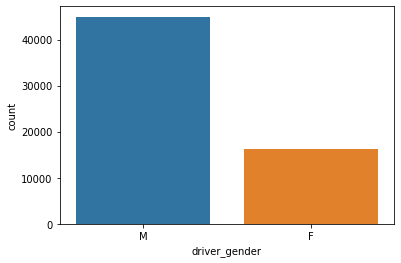

In [34]:
sns.countplot(data["driver_gender"])

# 9. Distplot for Driver Age.

C:\Users\Samir\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Axes: xlabel='driver_age', ylabel='Density'>

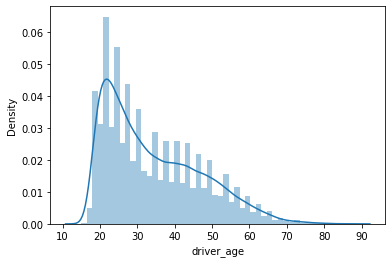

In [35]:
sns.distplot(data["driver_age"])

# 10. Countplot for Stop Outcome.

C:\Users\Samir\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Axes: xlabel='stop_outcome', ylabel='count'>

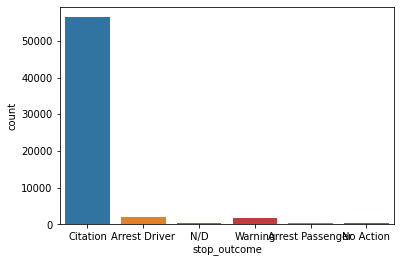

In [38]:
sns.countplot(data["stop_outcome"])